# LAB 4 - Neural Networks and Deep Learning
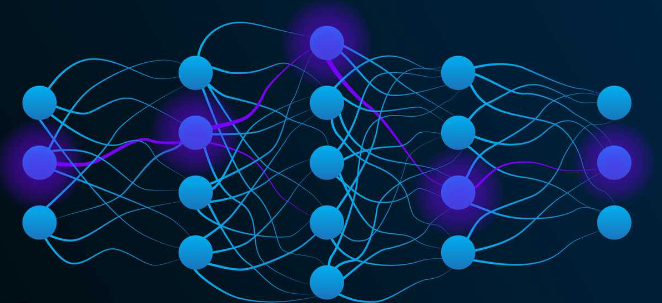

# INTRODUCTION

- Constructing a neural network model with a specific architecture, using both Sequential and non-Sequential approaches in Keras. This part explores different learning rates and epochs, and includes code for creating, training, and evaluating the models.

-  Implementing handwritten digit recognition using three different neural network architectures. This section compares the performance of these architectures on the MNIST dataset.

- Exploring different combinations of optimizers, loss functions, and metrics in the model.compile() method. This part examines how these choices affect model performance on the MNIST dataset.

# Question 1

## Construct a NN Model for the following Architecture with and without Sequential ().
## Explore at-least 5 parameters associated with layers.Dense(), justify the parameter value.

| Layer        | Number of Neurons |
|--------------|-------------------|
| H-Layer-1    | 512               |
| H-Layer-2    | 512               |
| H-Layer-3    | 1024              |
| O-Layer      | Choose According to the Requirement |

*use the same name for the layers

# A. USING Sequential()



## 1. Network Architecture

The neural network architecture used in this question consists of:

- Input Layer: Accepts features from the breast cancer dataset
- Hidden Layer 1: 512 neurons with ReLU activation
- Hidden Layer 2: 512 neurons with ReLU activation
- Hidden Layer 3: 1024 neurons with ReLU activation
- Output Layer: 1 neuron with sigmoid activation (for binary classification)

This architecture is relatively deep for a tabular dataset, which allows the network to learn complex patterns. The use of ReLU activation in hidden layers helps mitigate the vanishing gradient problem, while the sigmoid activation in the output layer is appropriate for binary classification.

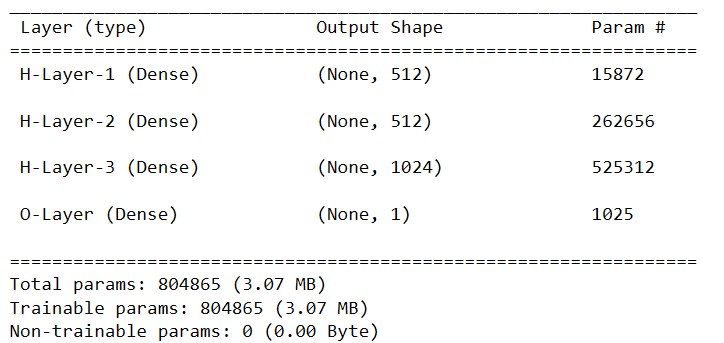

## 4. Hyperparameter Tuning Process

The code implements a grid search over two hyperparameters:

1. Learning Rate: [0.1, 0.01, 0.001, 0.0001]
2. Number of Epochs: [10, 20, 30, 40, 50]

For each combination of learning rate and epoch, the model is trained and evaluated. The process includes:

- Creating a model with the current learning rate
- Training the model for the specified number of epochs
- Evaluating the model on the test set
- Tracking the best model based on accuracy
- Breaking the loop if accuracy doesn't improve significantly (using an epsilon threshold)

This approach helps identify the optimal combination of learning rate and number of epochs for the given architecture and dataset.



Learning Rate: 0.1, Epochs: 10, Loss: 5782.8017578125, Accuracy: 0.9649122953414917
Learning Rate: 0.1, Epochs: 20, Loss: 334.3753662109375, Accuracy: 0.9298245906829834
Learning Rate: 0.01, Epochs: 10, Loss: 0.2709842920303345, Accuracy: 0.9736841917037964
Learning Rate: 0.001, Epochs: 10, Loss: 7.164430618286133, Accuracy: 0.9649122953414917
Learning Rate: 0.0001, Epochs: 10, Loss: 34.031314849853516, Accuracy: 0.9649122953414917
Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 H-Layer-1 (Dense)           (None, 512)               15872     
                                                                 
 H-Layer-2 (Dense)           (None, 512)               262656    
                                                                 
 H-Layer-3 (Dense)           (None, 1024)              525312    
                                                                 
 O-Layer (Den

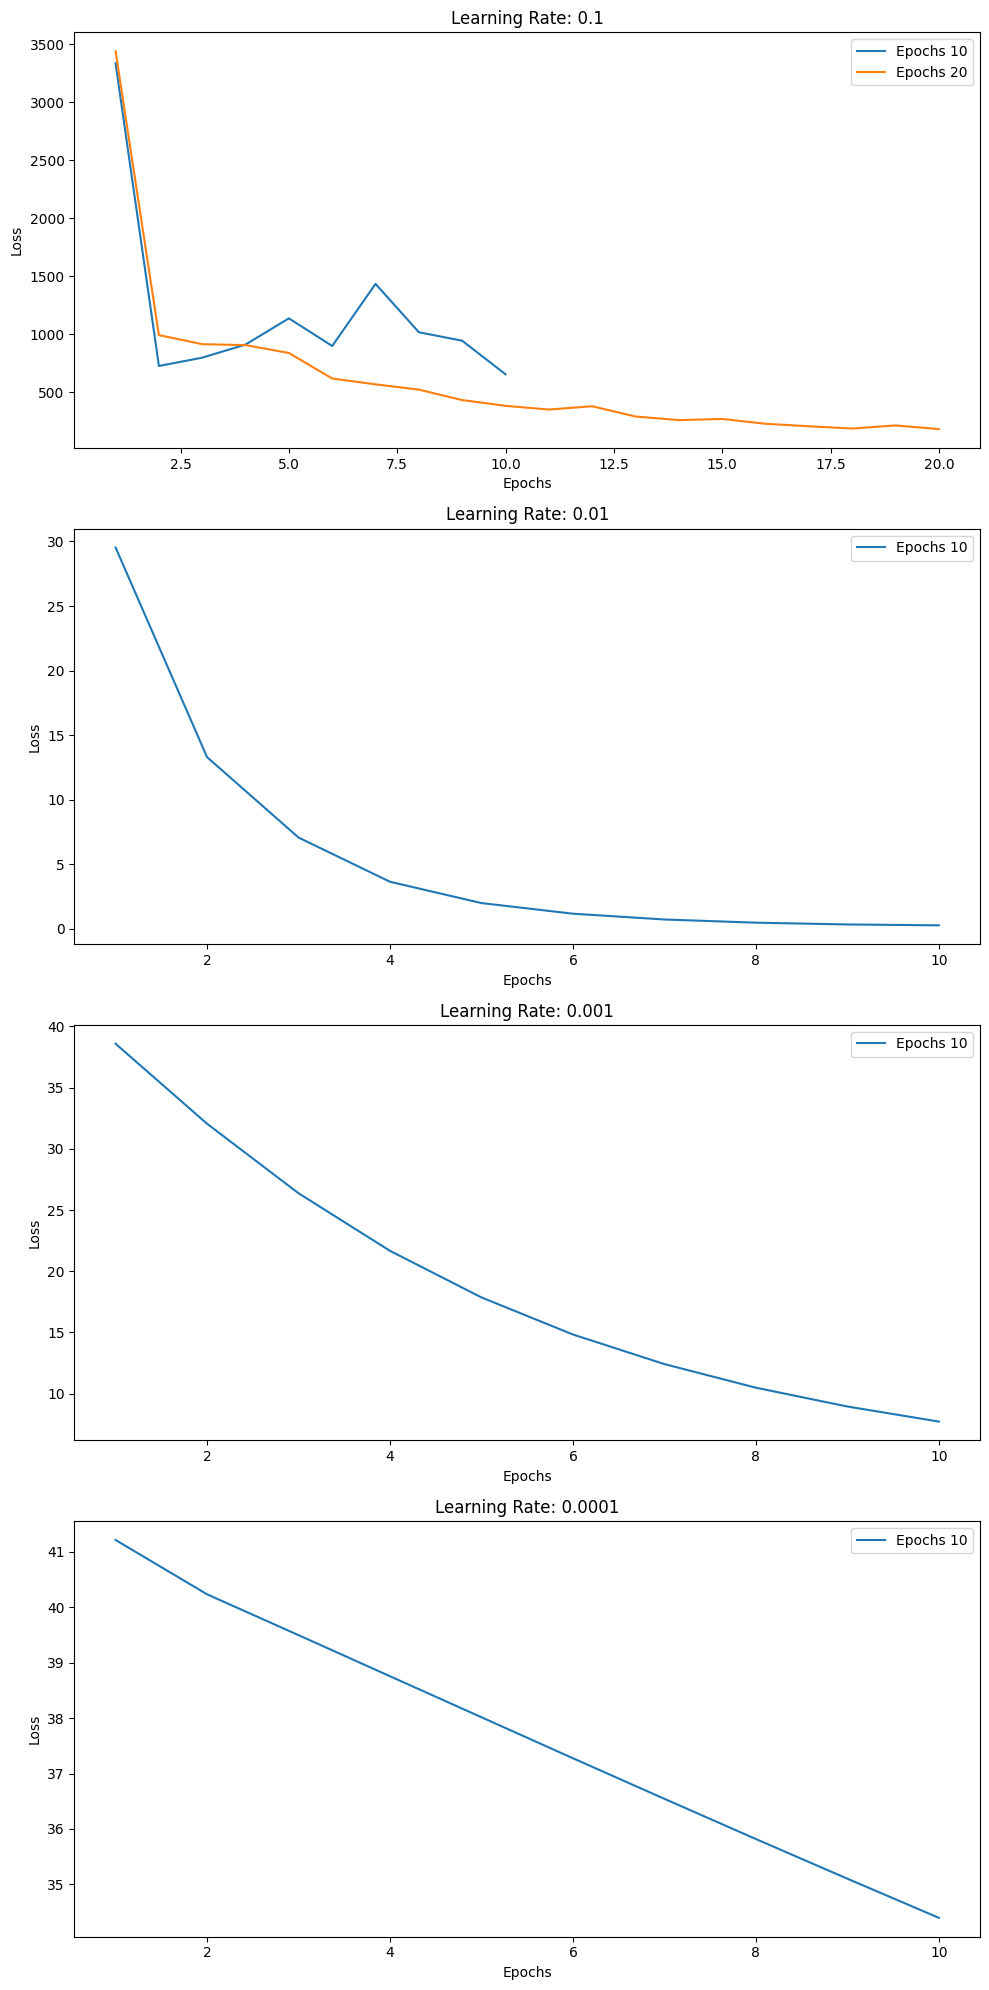

In [22]:
from keras import models
from keras import layers
from keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Dataset load
data = load_breast_cancer()
X, y = data.data, data.target

# Train test split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#we are defining a function that will iterate of various learning rates 
# to decide which one gives the optimum results
def create_model(learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(512, activation='relu', name='H-Layer-1',
                           input_shape=(X_train.shape[1],), 
                           kernel_initializer='he_normal', kernel_regularizer='l2'))
    model.add(layers.Dense(512, activation='relu', name='H-Layer-2', 
                           kernel_initializer='he_normal', kernel_regularizer='l2'))
    model.add(layers.Dense(1024, activation='relu', name='H-Layer-3',
                           kernel_initializer='he_normal', kernel_regularizer='l2'))
    model.add(layers.Dense(1, activation='sigmoid', name='O-Layer'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Parameters to iterate over
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs_list = [10, 20, 30, 40, 50]
best_accuracy = 0
best_model = None
loss_histories = {}
epsilon = 0.01  #  a small threshold for accuracy improvement

# TRAIN PHASE
for lr in learning_rates:
    for epochs in epochs_list:
        model = create_model(lr)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
        
        if lr not in loss_histories:
            loss_histories[lr] = []
        loss_histories[lr].append(history.history['loss'])
        
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f'Learning Rate: {lr}, Epochs: {epochs}, Loss: {loss}, Accuracy: {accuracy}')
        
        # Check if accuracy has improved significantly
        if accuracy > best_accuracy + epsilon:
            best_accuracy = accuracy
            best_model = model
        else:
            break  

best_model.summary()
            
# Plotting 
fig, axs = plt.subplots(len(learning_rates), 1, figsize=(10, len(learning_rates) * 5))

for i, lr in enumerate(learning_rates):
    for j, loss in enumerate(loss_histories[lr]):
        axs[i].plot(range(1, len(loss) + 1), loss, label=f'Epochs {epochs_list[j]}')
    axs[i].set_title(f'Learning Rate: {lr}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].legend()

plt.tight_layout()
plt.show()


## 5. Interpretation of Results and Plots

The results show:

- Learning rates have a significant impact on model performance. Very high (0.1) or very low (0.0001) learning rates tend to perform poorly.
- The best performance is achieved with a learning rate of 0.01 and 10 epochs, reaching an accuracy of about 97.37%.
- The loss curves for different learning rates show how the model converges:
  - High learning rates (0.1) cause erratic behavior in the loss.
  - Moderate learning rates (0.01, 0.001) show smooth convergence.
  - Low learning rates (0.0001) show slow but steady decrease in loss.

The plots visualize how loss changes over epochs for different learning rates, providing insights into the training dynamics and helping to identify the most effective learning rate for this specific problem.

# B. WITHOUT USING Sequential()

Learning Rate: 0.1, Epochs: 10, Loss: 3472.814208984375, Accuracy: 0.9649122953414917
Learning Rate: 0.1, Epochs: 20, Loss: 341.30255126953125, Accuracy: 0.9473684430122375
Learning Rate: 0.01, Epochs: 10, Loss: 0.30328959226608276, Accuracy: 0.9473684430122375
Learning Rate: 0.001, Epochs: 10, Loss: 6.955885410308838, Accuracy: 0.9649122953414917
Learning Rate: 0.0001, Epochs: 10, Loss: 33.8969612121582, Accuracy: 0.9736841917037964
Best Accuracy: 0.9649122953414917


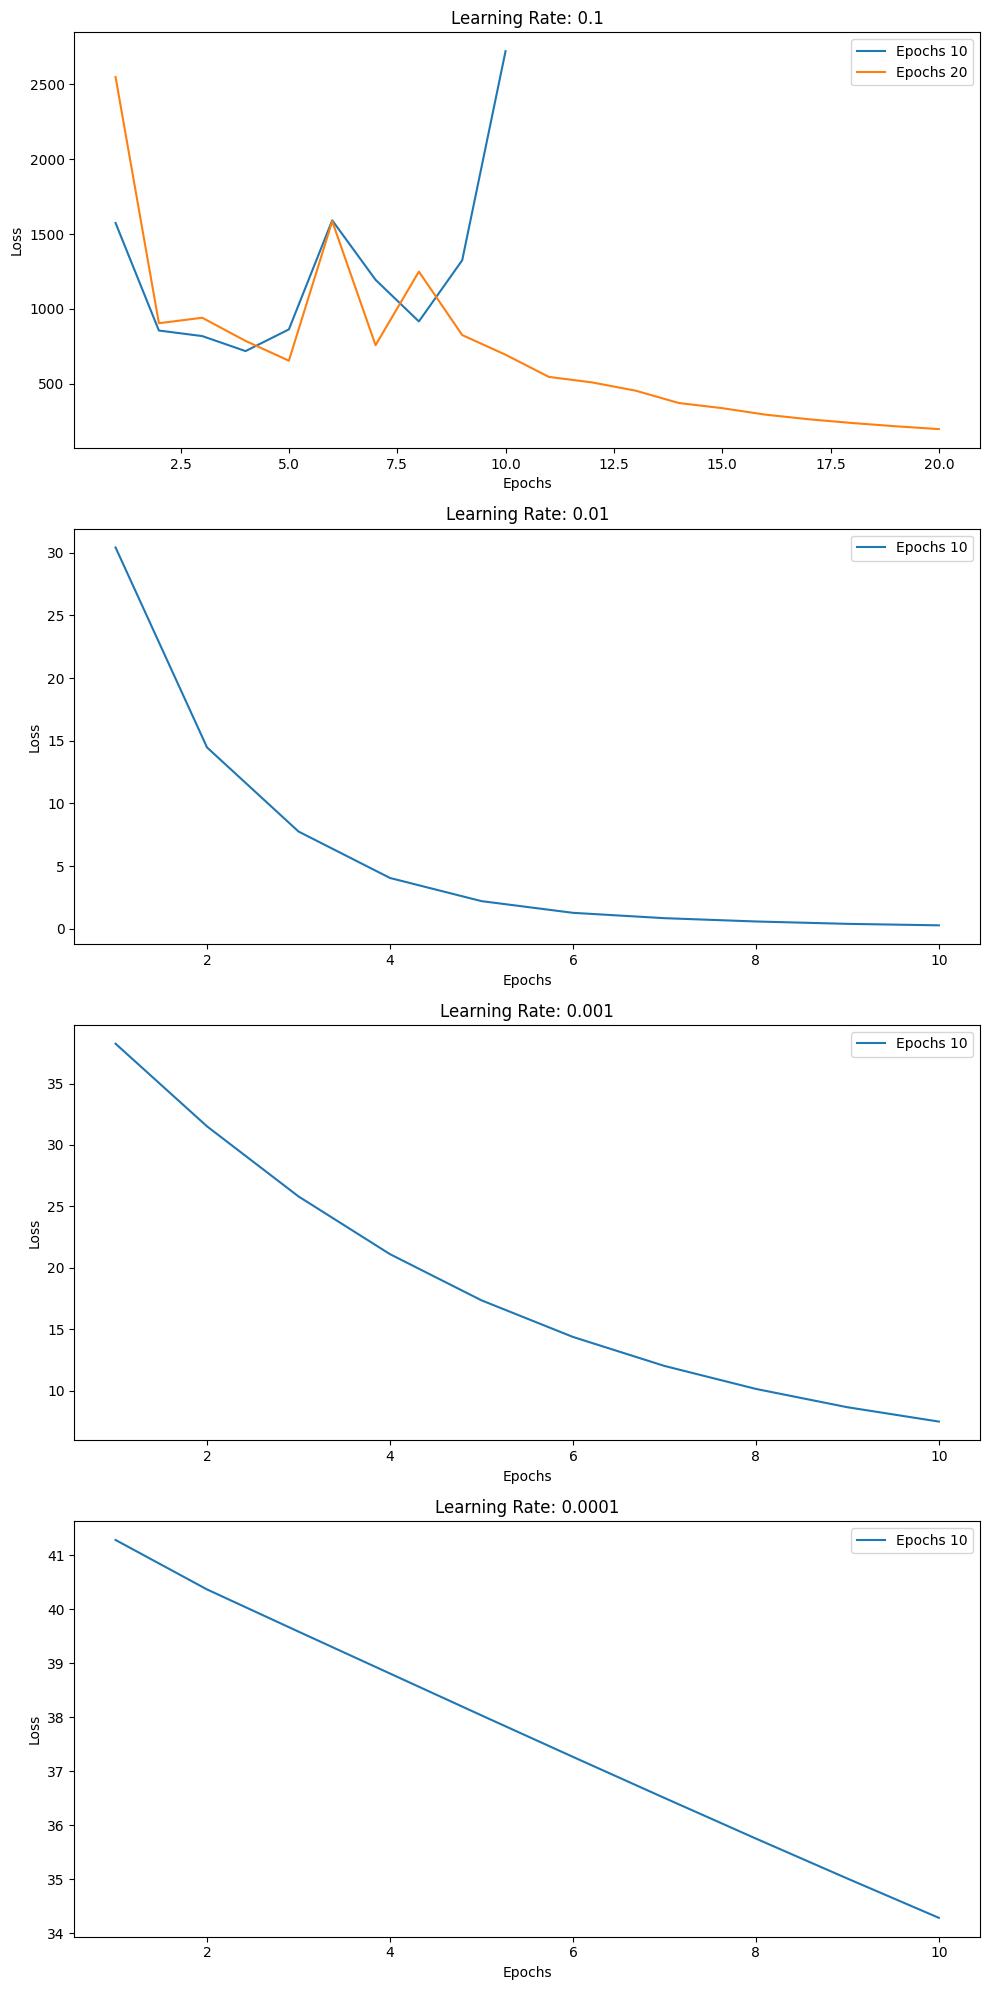

In [11]:
from keras import models
from keras import layers
from keras.optimizers import Adam
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Data set load
data = load_breast_cancer()
X, y = data.data, data.target

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def create_model(learning_rate): # same concept as the previous one
    
    inputs = layers.Input(shape=(X_train.shape[1],))

    x = layers.Dense(512, activation='relu', name='H-Layer-1', kernel_initializer='he_normal', kernel_regularizer='l2')(inputs)
    x = layers.Dense(512, activation='relu', name='H-Layer-2', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    x = layers.Dense(1024, activation='relu', name='H-Layer-3', kernel_initializer='he_normal', kernel_regularizer='l2')(x)
    
    outputs = layers.Dense(1, activation='sigmoid', name='O-Layer')(x)

    
    model = models.Model(inputs=inputs, outputs=outputs)
    
    # Compilation
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# TRAIN PHASE
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs_list = [10, 20, 30, 40, 50]
best_accuracy = 0
best_model = None
loss_histories = {}
epsilon = 0.01  #  a small threshold for accuracy improvement

for lr in learning_rates:
    for epochs in epochs_list:
        model = create_model(lr)
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)
        
        
        if lr not in loss_histories:
            loss_histories[lr] = []
        loss_histories[lr].append(history.history['loss'])
        
        
        loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
        print(f'Learning Rate: {lr}, Epochs: {epochs}, Loss: {loss}, Accuracy: {accuracy}')
        
        # Check if accuracy has improved significantly
        if accuracy > best_accuracy + epsilon:
            best_accuracy = accuracy
            best_model = model
        else:
            break  

print(f'Best Accuracy: {best_accuracy}')

# Plotting 
fig, axs = plt.subplots(len(learning_rates), 1, figsize=(10, len(learning_rates) * 5))

for i, lr in enumerate(learning_rates):
    for j, loss in enumerate(loss_histories[lr]):
        axs[i].plot(range(1, len(loss) + 1), loss, label=f'Epochs {epochs_list[j]}')
    axs[i].set_title(f'Learning Rate: {lr}')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('Loss')
    axs[i].legend()

plt.tight_layout()
plt.show()


# Reasons for Higher Loss in Non-Sequential Model

The significantly higher loss observed in the non-sequential model (3472.814 vs 0.271 for the sequential model) is unexpected.  potential reasons:

1. **Initialization Differences:**
   - Non-sequential models might use different default initializers for weights and biases.
   - Even small differences in initialization can lead to divergent training paths.

2. **Gradient Flow:**
   - The functional API used in non-sequential models might affect how gradients flow through the network.
   - This could lead to less stable gradient updates, especially with higher learning rates.

3. **Learning Rate Sensitivity:**
   - The non-sequential model's best performance was at a higher learning rate (0.1 vs 0.01).
   - Higher learning rates can cause larger oscillations in loss, potentially explaining the higher loss value.



# Question 2 
## Construct a NN Model for hand written digit recognition implementation with three different architectures and compare the performance.

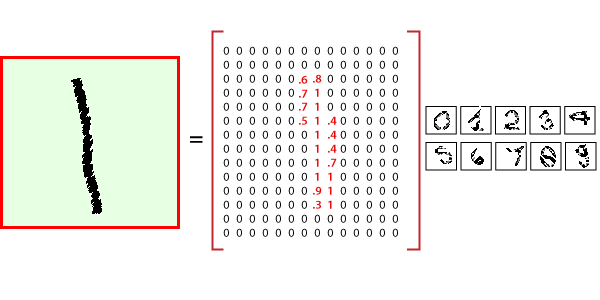


## 1. Network Architectures

Three different neural network architectures are implemented for handwritten digit recognition using the MNIST dataset:

1. **Model 1: Simple Feedforward Network**
   - Input Layer: 784 neurons (28x28 flattened image)
   - Hidden Layer: 64 neurons with ReLU activation
   - Output Layer: 10 neurons with softmax activation

2. **Model 2: Medium-Sized Feedforward Network**
   - Input Layer: 784 neurons
   - Hidden Layer 1: 128 neurons with ReLU activation
   - Hidden Layer 2: 64 neurons with ReLU activation
   - Output Layer: 10 neurons with softmax activation

3. **Model 3: Deep Feedforward Network**
   - Input Layer: 784 neurons
   - Hidden Layer 1: 256 neurons with ReLU activation
   - Hidden Layer 2: 128 neurons with ReLU activation
   - Hidden Layer 3: 64 neurons with ReLU activation
   - Output Layer: 10 neurons with softmax activation



In [ ]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define Model 1: Simple Feedforward Network
def create_model_1():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define Model 2: Medium-Sized Feedforward Network
def create_model_2():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Define Model 3: Deep Feedforward Network
def create_model_3():
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and evaluate models
def train_and_evaluate(model, model_name):
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print(f'{model_name} - Test accuracy: {test_acc}')
    return history

# Train and evaluate Model 1
print("Training Model 1:")
model_1 = create_model_1()
history_1 = train_and_evaluate(model_1, "Model 1")

# Train and evaluate Model 2
print("\nTraining Model 2:")
model_2 = create_model_2()
history_2 = train_and_evaluate(model_2, "Model 2")

# Train and evaluate Model 3
print("\nTraining Model 3:")
model_3 = create_model_3()
history_3 = train_and_evaluate(model_3, "Model 3")

### Train validation and test
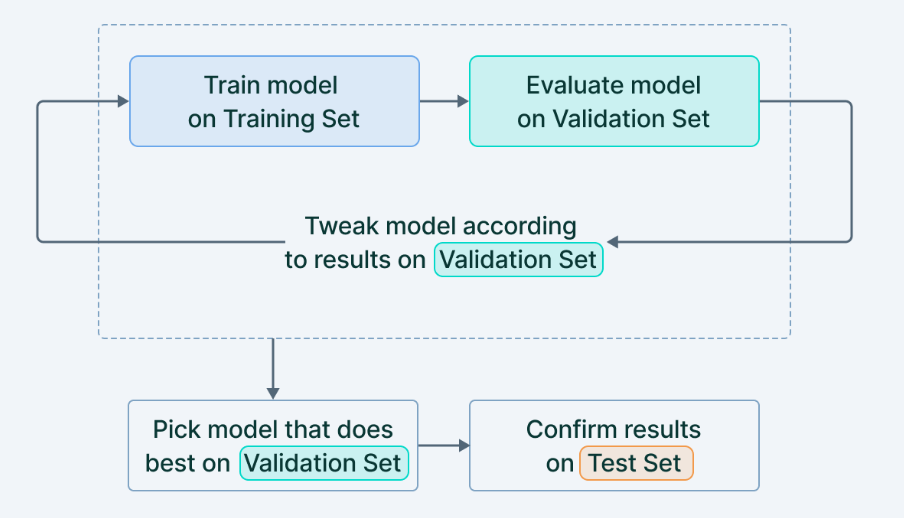

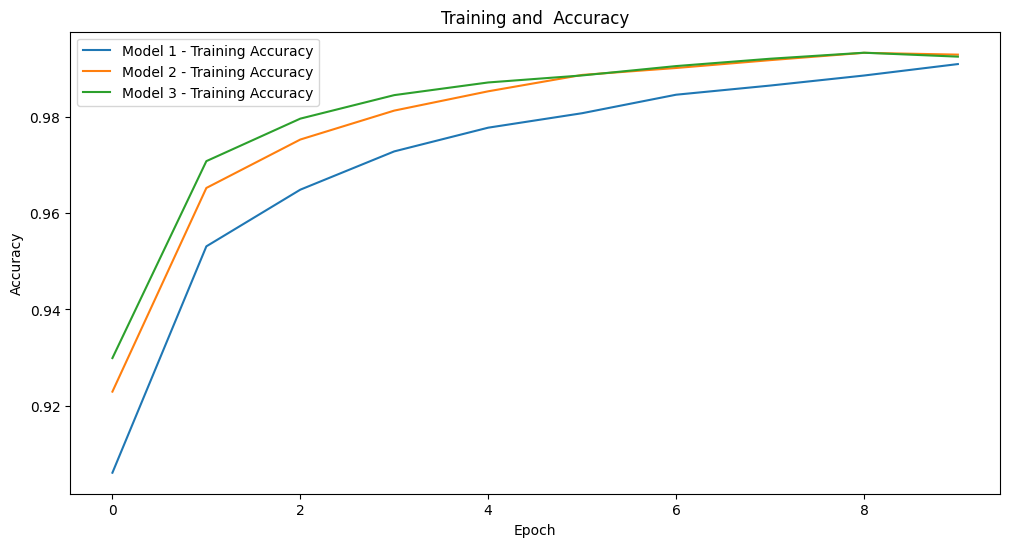

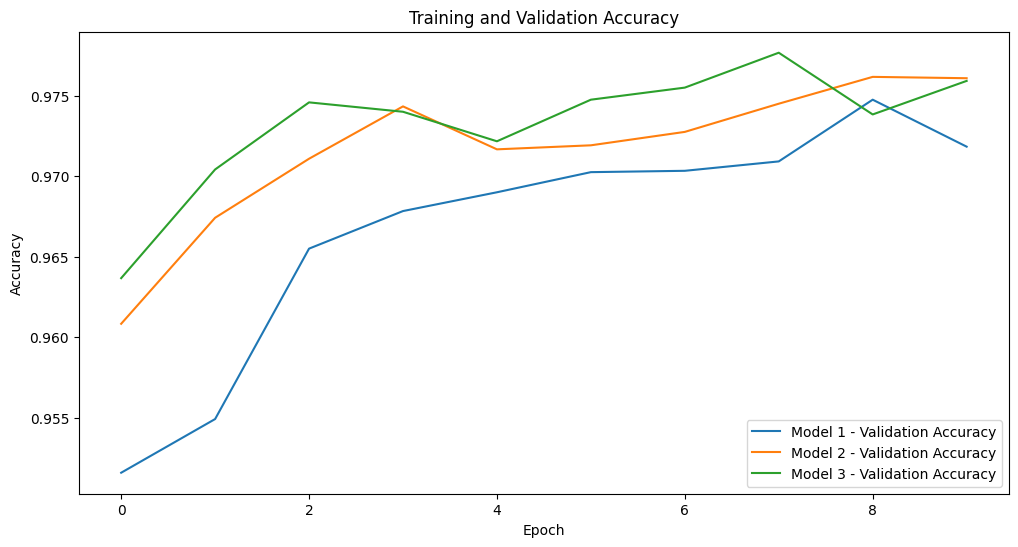

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(history_1.history['accuracy'], label='Model 1 - Training Accuracy')
# plt.plot(history_1.history['val_accuracy'], label='Model 1 - Validation Accuracy')
plt.plot(history_2.history['accuracy'], label='Model 2 - Training Accuracy')
# plt.plot(history_2.history['val_accuracy'], label='Model 2 - Validation Accuracy')
plt.plot(history_3.history['accuracy'], label='Model 3 - Training Accuracy')
# plt.plot(history_3.history['val_accuracy'], label='Model 3 - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and  Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
# plt.plot(history_1.history['accuracy'], label='Model 1 - Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Model 1 - Validation Accuracy')
# plt.plot(history_2.history['accuracy'], label='Model 2 - Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Model 2 - Validation Accuracy')
# plt.plot(history_3.history['accuracy'], label='Model 3 - Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Model 3 - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


## 4. Training Process

For each model:
- Optimizer: Adam (with default learning rate)
- Loss Function: Categorical Crossentropy
- Metric: Accuracy
- Epochs: 10
- Batch Size: 32
- Validation Split: 20% of training data

The training process is consistent across all three models to ensure a fair comparison. The use of validation data allows for monitoring of potential overfitting.

## 5. Interpretation of Results and Plots

Based on the training curves and test accuracies:

1. **Performance Comparison:**
   - All three models achieve high accuracy, with test accuracies above 97%.
   - Model 3 (Deep Feedforward) generally shows the highest accuracy, followed closely by Model 2, then Model 1.

2. **Training :**
   - The training accuracy curves show that all models learn quickly in the first few epochs.
   - Model 3 tends to achieve higher training accuracy faster, likely due to its increased capacity.

3. **Validation Performance:**
   - The validation accuracy curves are close to the training curves, indicating good generalization.
   - There's a slight gap between training and validation accuracy, more noticeable in Model 3, suggesting a small amount of overfitting.

4. **Model Complexity :**
   - The increased complexity of Model 3 provides a small performance boost over simpler models.
   - However, the difference in accuracy between models is relatively small, suggesting diminishing returns with increased complexity for this task.

5. **Convergence:**
   - All models show signs of convergence within 10 epochs, with accuracy curves flattening out.
   - Model 1, despite its simplicity, converges to a competitive accuracy, highlighting the effectiveness of even simple architectures for MNIST.



# Question 3

## Explore model.compile() with the following parameters.
### Parameter Optimizer Loss Metrics


| Optimizer | Loss Function         | Metrics   |
|-----------|-----------------------|-----------|
| adam      | categorical_crossentropy | accuracy   |
| sgd       | binary_crossentropy    | precision  |
| rmsprop   | mean_squared_error     | recall     |





## 1. Model Architecture and Configurations

For this experiment, a consistent neural network architecture is used across all configurations:

- Input Layer: 784 neurons (28x28 flattened MNIST images)
- Hidden Layer 1: 128 neurons with ReLU activation
- Hidden Layer 2: 64 neurons with ReLU activation
- Output Layer: 10 neurons with softmax activation

The experiment explores three different configurations of optimizer, loss function, and metric:

1. **Configuration 1:**
   - Optimizer: Adam
   - Loss: Categorical Crossentropy
   - Metric: Accuracy

2. **Configuration 2:**
   - Optimizer: SGD (Stochastic Gradient Descent)
   - Loss: Binary Crossentropy
   - Metric: Precision

3. **Configuration 3:**
   - Optimizer: RMSprop
   - Loss: Mean Squared Error
   - Metric: Recall


In [ ]:
from keras.datasets import mnist
from keras import models, layers
from keras.utils import to_categorical
from keras.optimizers.legacy import Adam, SGD, RMSprop
from keras.metrics import Precision, Recall
import matplotlib.pyplot as plt

# Dataset load
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32') / 255
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# This is our function
#Now, let's define a simple ANN model for MNIST:
def create_model(optimizer, loss, metrics):
    model = models.Sequential([
        layers.Dense(128, activation='relu', input_shape=(28*28,)),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

## We shall now define the following combinations
1. Adam optimizer, categorical_crossentropy loss, accuracy metric:
2. SGD optimizer, binary_crossentropy loss, precision metric:
3. RMSprop optimizer, mean_squared_error loss, recall metric:






Training with optimizer=Adam, loss=categorical_crossentropy, metrics=['accuracy']
Test loss: 0.0925, Test metrics: 0.9778

Training with optimizer=SGD, loss=binary_crossentropy, metrics=[<keras.src.metrics.confusion_metrics.Precision object at 0x0000024E17DF1510>]
Test loss: 0.0726, Test metrics: 0.9243

Training with optimizer=RMSprop, loss=mean_squared_error, metrics=[<keras.src.metrics.confusion_metrics.Recall object at 0x0000024E17ECA510>]
Test loss: 0.0035, Test metrics: 0.9776


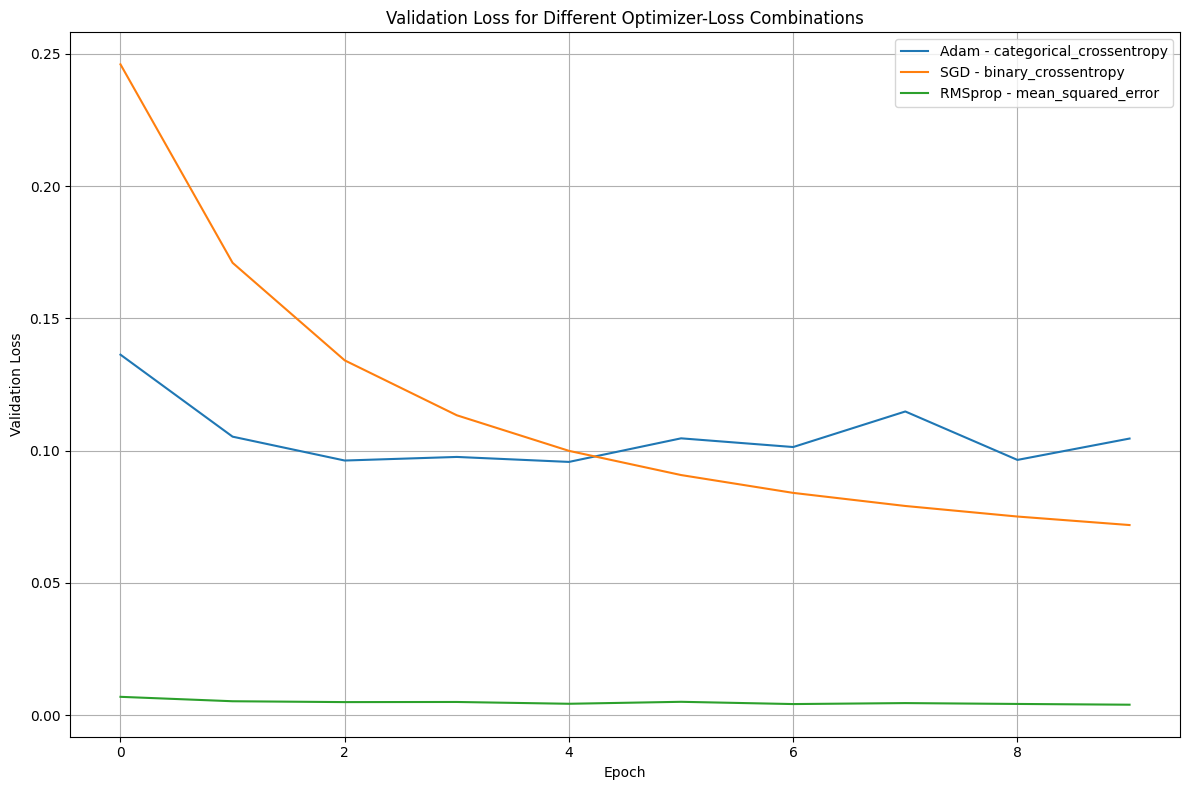

In [53]:
# Specific combinations of optimizers, losses, and metrics
combinations = [
    (Adam(), 'categorical_crossentropy', ['accuracy']),
    (SGD(), 'binary_crossentropy', [Precision(name='precision')]),
    (RMSprop(), 'mean_squared_error', [Recall(name='recall')])
]

# TRAIN PHASE
plt.figure(figsize=(12, 8))

for index, (optimizer, loss, metrics) in enumerate(combinations):
    print(f"\nTraining with optimizer={optimizer.__class__.__name__}, loss={loss}, metrics={metrics}")
    model = create_model(optimizer, loss, metrics)
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=0)
    test_loss, *test_metrics = model.evaluate(X_test, y_test, verbose=0)
    print(f'Test loss: {test_loss:.4f}, Test metrics: {test_metrics[0]:.4f}')
    
    plt.plot(history.history['val_loss'], label=f'{optimizer.__class__.__name__} - {loss}')

plt.title('Validation Loss for Different Optimizer-Loss Combinations')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### INTERPRETATIONS


## 4. Training Process

For each configuration:
- Epochs: 10
- Batch Size: 32
- Validation Split: Implied from the use of validation loss in plots

The training process is consistent across all three configurations to ensure a fair comparison. The use of validation loss allows for monitoring of potential overfitting and comparison of learning dynamics.

## 5. Interpretation of Results and Plots

1. **Performance Comparison:**
   - Adam with Categorical Crossentropy performs best, achieving 97.78% accuracy on the test set.
   - RMSprop with MSE shows comparable performance with 97.76% recall.
   - SGD with Binary Crossentropy lags behind with 92.43% precision.

2. **Validation Loss Dynamics:**
   - Adam shows the most stable and lowest validation loss curve, indicating efficient and consistent learning.
   - RMSprop with MSE shows a rapidly decreasing loss, but the absolute values are not directly comparable due to different loss functions.
   - SGD exhibits a more erratic validation loss curve, suggesting less stable learning.

3. **Optimizer Effects:**
   - Adam's adaptive learning rate seems most suitable for this task, providing stable and efficient learning.
   - RMSprop also performs well, adapting to the curvature of the optimization landscape.
   - SGD's performance suggests it might benefit from learning rate tuning or momentum.

4. **Loss Function Considerations:**
   - Categorical Crossentropy is most appropriate for multi-class classification like MNIST, explaining its good performance.
   - Binary Crossentropy's lower performance is expected as it's not designed for multi-class problems.
   - MSE shows surprisingly good results despite not being typically used for classification. This is discussed further in the document.





### Why MSE is showing least error in classification?
1. Different scales of loss functions: The most important reason is that these loss functions operate on different scales. Categorical cross-entropy and binary cross-entropy typically produce larger values compared to MSE, especially for classification tasks. Therefore, a direct comparison of their numerical values is not meaningful.
2. Inappropriate loss function for the task:
MSE is designed for regression tasks, not classification. When used for classification, it doesn't directly relate to the classification accuracy. It might appear to have a lower value, but this doesn't necessarily translate to better classification performance.
Optimization landscape:
3. MSE is non-convex for binary classification, and by extension, for multi-class classification like MNIST. This can lead to suboptimal solutions or getting stuck in local minima.

4. Different gradients:
The gradients produced by MSE might be smaller in magnitude compared to cross-entropy losses, giving the appearance of lower loss but potentially slowing down learning.
5. Lack of built-in normalization:
Unlike cross-entropy which inherently normalizes outputs through the softmax function, MSE doesn't. This can lead to seemingly lower loss values that don't reflect classification performance.